In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick

In [24]:
L8 = [(0.01, 1.0),(0.03, 1.0),(0.05, 0.993),(0.07, 0.97),(0.09, 0.95),(0.12, 0.824),(0.14, 0.73),(0.16, 0.679),(0.18, 0.552),(0.2, 0.482)]
L16 = [(0.01, 1.0), (0.03111111111111111, 1.0), (0.052222222222222225, 1.0), (0.07333333333333333, 1.0), (0.09444444444444444, 1.0), (0.11555555555555555, 0.995), (0.1366666666666667, 0.983), (0.1577777777777778, 0.945), (0.1788888888888889, 0.86), (0.2, 0.716)]

L8error_prob, L8_failure_rate = [val[0] for val in L8 if val[1] < 1], [1 - val[1] for val in L8 if val[1] < 1]
L16error_prob, L16_failure_rate =  [val[0] for val in L16 if val[1] < 1], [1 - val[1] for val in L16 if val[1] < 1]

In [25]:
def nixon_ansatz(L, p):
    p1 = (0.18)*(L**(1.47))*(math.log(p)) 
    p2 =  ((0.59)*L**(1.25))
    cval = p1+p2
    return 0.17 * math.exp(cval)


nixon8error_prob = np.linspace(0.03, 0.2, 20)
nixon8failure_rate = [nixon_ansatz(8, p) for p in nixon8error_prob]


nixon16error_prob =  np.linspace(0.01, 0.2, 20)
nixon16failure_rate =  [nixon_ansatz(16, p) for p in nixon16error_prob]

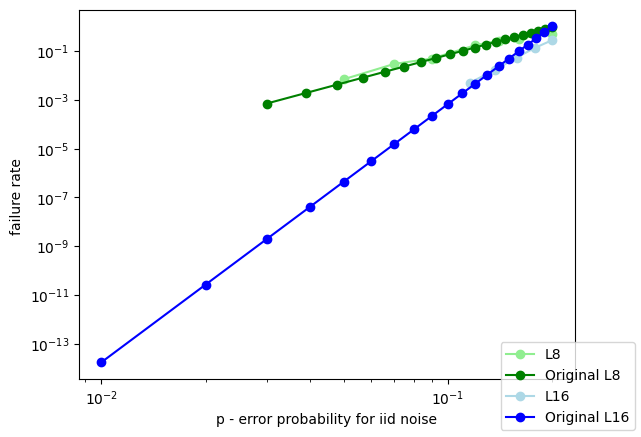

In [37]:
fig, ax = plt.subplots()
ax.set_xlabel("p - error probability for iid noise")
ax.set_ylabel("failure rate ")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
#ax.set_xticks(nixon16error_prob, minor=True)
ax.get_xaxis().get_major_formatter().labelOnlyBase = False
ax.xaxis.set_major_formatter(mtick.ScalarFormatter())
ax.set_xticks( np.geomspace(10**-2, 10**-3 ,15) )

ax.loglog(L8error_prob, L8_failure_rate, label="L8", marker="o", color="lightgreen")
ax.loglog(nixon8error_prob, nixon8failure_rate,  label="Original L8", marker="o", color="green")

ax.loglog(L16error_prob, L16_failure_rate, label="L16", marker="o", color="lightblue")
ax.loglog(nixon16error_prob, nixon16failure_rate,  label="Original L16", marker="o", color="blue")
fig.legend(loc='lower right', fancybox=True)


In [9]:
nixon16failure_rate[-1]

1.0482239002339435